### Task 3 - Model Building and Interpretation
#### Problem Statement:
The client has provided 3 datasets, it is now your job to combine, transform and model these datasets in a suitable way to answer the problem statement that the business has requested. 

Most importantly, once the modeling process is complete, we need you to communicate your work and analysis in the form of a single PowerPoint slide, so that we can present the results back to the business. The key here is to use business-friendly language and to explain your results in a way that the business will understand. For example, ensure that when you’re summarizing the performance of the results you don’t use technical metrics, but rather convert it into numbers that they’ll understand.

In [217]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [218]:
# read all the 3 datasets
sales_data = pd.read_csv("E:\Forage_Virtual_Internship_Program\Cognizant\Task 3 - Model Building and Interpretation\sales.csv", index_col=0)
stock_level_data = pd.read_csv("E:\Forage_Virtual_Internship_Program\Cognizant\Task 3 - Model Building and Interpretation\sensor_stock_levels.csv", index_col=0)
storage_temp_data = pd.read_csv("E:\Forage_Virtual_Internship_Program\Cognizant\Task 3 - Model Building and Interpretation\sensor_storage_temperature.csv", index_col=0)

In [219]:
# print shape of all the 3 datasets
print("sales_data", sales_data.shape)
print("stock_level_data", stock_level_data.shape)
print("storage_temp_data", storage_temp_data.shape)

sales_data (7829, 9)
stock_level_data (15000, 4)
storage_temp_data (23890, 3)


In [220]:
# let's look at some few records from our datasets
print("sales_data")
sales_data.head()

sales_data


,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


In [221]:
print("stock_level_data")
stock_level_data.head()

stock_level_data


,id,timestamp,product_id,estimated_stock_pct
0,4220e505-c247-478d-9831-6b9f87a4488a,2022-03-07 12:13:02,f658605e-75f3-4fed-a655-c0903f344427,0.75
1,f2612b26-fc82-49ea-8940-0751fdd4d9ef,2022-03-07 16:39:46,de06083a-f5c0-451d-b2f4-9ab88b52609d,0.48
2,989a287f-67e6-4478-aa49-c3a35dac0e2e,2022-03-01 18:17:43,ce8f3a04-d1a4-43b1-a7c2-fa1b8e7674c8,0.58
3,af8e5683-d247-46ac-9909-1a77bdebefb2,2022-03-02 14:29:09,c21e3ba9-92a3-4745-92c2-6faef73223f7,0.79
4,08a32247-3f44-4002-85fb-c198434dd4bb,2022-03-02 13:46:18,7f478817-aa5b-44e9-9059-8045228c9eb0,0.22


In [222]:
print("storage_temp_data")
storage_temp_data.head()

storage_temp_data


,id,timestamp,temperature
0,d1ca1ef8-0eac-42fc-af80-97106efc7b13,2022-03-07 15:55:20,2.96
1,4b8a66c4-0f3a-4f16-826f-8cf9397e9d18,2022-03-01 09:18:22,1.88
2,3d47a0c7-1e72-4512-812f-b6b5d8428cf3,2022-03-04 15:12:26,1.78
3,9500357b-ce15-424a-837a-7677b386f471,2022-03-02 12:30:42,2.18
4,c4b61fec-99c2-4c6d-8e5d-4edd8c9632fa,2022-03-05 09:09:33,1.38


In [223]:
# let's look at some quick info about these 3 datasets
print("sales_data")
sales_data.info()

sales_data
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  7829 non-null   object 
 1   timestamp       7829 non-null   object 
 2   product_id      7829 non-null   object 
 3   category        7829 non-null   object 
 4   customer_type   7829 non-null   object 
 5   unit_price      7829 non-null   float64
 6   quantity        7829 non-null   int64  
 7   total           7829 non-null   float64
 8   payment_type    7829 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 611.6+ KB


In [224]:
print("stock_level_data")
stock_level_data.info()

stock_level_data
<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 0 to 14999
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   15000 non-null  object 
 1   timestamp            15000 non-null  object 
 2   product_id           15000 non-null  object 
 3   estimated_stock_pct  15000 non-null  float64
dtypes: float64(1), object(3)
memory usage: 585.9+ KB


In [225]:
print("storage_temp_data")
storage_temp_data.info()

storage_temp_data
<class 'pandas.core.frame.DataFrame'>
Int64Index: 23890 entries, 0 to 23889
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           23890 non-null  object 
 1   timestamp    23890 non-null  object 
 2   temperature  23890 non-null  float64
dtypes: float64(1), object(2)
memory usage: 746.6+ KB


In [226]:
# let's check for null/missing values in the dataset
print("sales_data")
sales_data.isnull().sum()

sales_data


transaction_id    0
timestamp         0
product_id        0
category          0
customer_type     0
unit_price        0
quantity          0
total             0
payment_type      0
dtype: int64

In [227]:
print("stock_level_data")
stock_level_data.isnull().sum()

stock_level_data


id                     0
timestamp              0
product_id             0
estimated_stock_pct    0
dtype: int64

In [228]:
print("storage_temp_data")
storage_temp_data.isnull().sum()

storage_temp_data


id             0
timestamp      0
temperature    0
dtype: int64

In [229]:
# check for duplicate records
print("sales_data")
sales_data.duplicated().sum()

sales_data


0

In [230]:
print("stock_level_data")
stock_level_data.duplicated().sum()

stock_level_data


0

In [231]:
print("storage_temp_data")
storage_temp_data.duplicated().sum()

storage_temp_data


0

As you can see that there are no null/missing values in the data and no duplicate records. However, we need to change the datatype of timestamp column to a datetime for further processing.

In [232]:
def convert_to_datetime(data: pd.DataFrame = None, column: str = None):
  dummy = data.copy()
  dummy[column] = pd.to_datetime(dummy[column], format='%Y-%m-%d %H:%M:%S')
  return dummy

In [233]:
sales_data = convert_to_datetime(data=sales_data, column='timestamp')
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  7829 non-null   object        
 1   timestamp       7829 non-null   datetime64[ns]
 2   product_id      7829 non-null   object        
 3   category        7829 non-null   object        
 4   customer_type   7829 non-null   object        
 5   unit_price      7829 non-null   float64       
 6   quantity        7829 non-null   int64         
 7   total           7829 non-null   float64       
 8   payment_type    7829 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 611.6+ KB


In [234]:
stock_level_data = convert_to_datetime(data=stock_level_data, column='timestamp')
stock_level_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 0 to 14999
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   15000 non-null  object        
 1   timestamp            15000 non-null  datetime64[ns]
 2   product_id           15000 non-null  object        
 3   estimated_stock_pct  15000 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 585.9+ KB


In [235]:
storage_temp_data = convert_to_datetime(data=storage_temp_data, column='timestamp')
storage_temp_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23890 entries, 0 to 23889
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           23890 non-null  object        
 1   timestamp    23890 non-null  datetime64[ns]
 2   temperature  23890 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 746.6+ KB


#### Merge data

Currently we have 3 datasets. In order to include all of this data within a predictive model, we need to merge them together into 1 dataframe. 

If we revisit the problem statement: 

```
“Can we accurately predict the stock levels of products, based on sales data and sensor data, 
on an hourly basis in order to more intelligently procure products from our suppliers.”
```

The client indicates that they want the model to predict on an hourly basis. Looking at the data model, we can see that only column that we can use to merge the 3 datasets together is `timestamp`.

So, we must first transform the `timestamp` column in all 3 datasets to be based on the hour of the day, then we can merge the datasets together.

In [236]:
from datetime import datetime

def convert_timestamp_to_hourly(data: pd.DataFrame = None, column: str = None):
  dummy = data.copy()
  new_ts = dummy[column].tolist()
  new_ts = [i.strftime('%Y-%m-%d %H:00:00') for i in new_ts]
  new_ts = [datetime.strptime(i, '%Y-%m-%d %H:00:00') for i in new_ts]
  dummy[column] = new_ts
  return dummy

In [237]:
sales_data = convert_timestamp_to_hourly(data=sales_data, column='timestamp')
sales_data.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:00:00,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:00:00,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:00:00,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:00:00,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:00:00,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


In [238]:
stock_level_data = convert_timestamp_to_hourly(data=stock_level_data, column='timestamp')
stock_level_data.head()

,id,timestamp,product_id,estimated_stock_pct
0,4220e505-c247-478d-9831-6b9f87a4488a,2022-03-07 12:00:00,f658605e-75f3-4fed-a655-c0903f344427,0.75
1,f2612b26-fc82-49ea-8940-0751fdd4d9ef,2022-03-07 16:00:00,de06083a-f5c0-451d-b2f4-9ab88b52609d,0.48
2,989a287f-67e6-4478-aa49-c3a35dac0e2e,2022-03-01 18:00:00,ce8f3a04-d1a4-43b1-a7c2-fa1b8e7674c8,0.58
3,af8e5683-d247-46ac-9909-1a77bdebefb2,2022-03-02 14:00:00,c21e3ba9-92a3-4745-92c2-6faef73223f7,0.79
4,08a32247-3f44-4002-85fb-c198434dd4bb,2022-03-02 13:00:00,7f478817-aa5b-44e9-9059-8045228c9eb0,0.22


In [239]:
storage_temp_data = convert_timestamp_to_hourly(data=storage_temp_data, column='timestamp')
storage_temp_data.head()

,id,timestamp,temperature
0,d1ca1ef8-0eac-42fc-af80-97106efc7b13,2022-03-07 15:00:00,2.96
1,4b8a66c4-0f3a-4f16-826f-8cf9397e9d18,2022-03-01 09:00:00,1.88
2,3d47a0c7-1e72-4512-812f-b6b5d8428cf3,2022-03-04 15:00:00,1.78
3,9500357b-ce15-424a-837a-7677b386f471,2022-03-02 12:00:00,2.18
4,c4b61fec-99c2-4c6d-8e5d-4edd8c9632fa,2022-03-05 09:00:00,1.38


Now you can see all of the timestamp columns have had the minutes and seconds reduced to 00. The next thing to do, is to aggregate the datasets in order to combine rows which have the same value for timestamp.

For the sales data, we want to group the data by timestamp but also by product_id. When we aggregate, we must choose which columns to aggregate by the grouping. For now, let's aggregate quantity.

In [240]:
sales_agg = sales_data.groupby(['timestamp', 'product_id']).agg({'quantity':'sum'}).reset_index()
sales_agg.head()

,timestamp,product_id,quantity
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,3
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,3
2,2022-03-01 09:00:00,03a2557a-aa12-4add-a6d4-77dc36342067,3
3,2022-03-01 09:00:00,049b2171-0eeb-4a3e-bf98-0c290c7821da,7
4,2022-03-01 09:00:00,04da844d-8dba-4470-9119-e534d52a03a0,11


In [241]:
stock_agg = stock_level_data.groupby(['timestamp', 'product_id']).agg({'estimated_stock_pct':'mean'}).reset_index()
stock_agg.head()

,timestamp,product_id,estimated_stock_pct
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05


In [242]:
temp_agg = storage_temp_data.groupby(['timestamp']).agg({'temperature':'mean'}).round(2).reset_index()
temp_agg.head()

,timestamp,temperature
0,2022-03-01 09:00:00,-0.03
1,2022-03-01 10:00:00,1.28
2,2022-03-01 11:00:00,-0.56
3,2022-03-01 12:00:00,-0.54
4,2022-03-01 13:00:00,-0.19


This gives us the average temperature of the storage facility where the produce is stored in the warehouse by unique hours during the week. Now, we are ready to merge our data. We will use the stock_agg table as our base table, and we will merge our other 2 tables onto this.

In [243]:
merged_data = stock_agg.merge(right=sales_agg, how='left', on=['timestamp', 'product_id'])
merged_data.head()

,timestamp,product_id,estimated_stock_pct,quantity
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,NaN
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,NaN
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,NaN


In [244]:
merged_data.isnull().sum()

timestamp                 0
product_id                0
estimated_stock_pct       0
quantity               7778
dtype: int64

In [245]:
merged_data = merged_data.merge(right=temp_agg, how='left', on=['timestamp'])
merged_data.head()

,timestamp,product_id,estimated_stock_pct,quantity,temperature
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.03
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,-0.03
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,NaN,-0.03
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,NaN,-0.03
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,NaN,-0.03


In [246]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10845 entries, 0 to 10844
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   timestamp            10845 non-null  datetime64[ns]
 1   product_id           10845 non-null  object        
 2   estimated_stock_pct  10845 non-null  float64       
 3   quantity             3067 non-null   float64       
 4   temperature          10845 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 508.4+ KB


In [247]:
merged_data.isnull().sum()

timestamp                 0
product_id                0
estimated_stock_pct       0
quantity               7778
temperature               0
dtype: int64

We can see from the .info() method that we have some null values. These need to be treated before we can build a predictive model. The column that features some null values is quantity. We can assume that if there is a null value for this column, it represents that there were 0 sales of this product within this hour. So, lets fill this columns null values with 0, however, we should verify this with the client, in order to make sure we're not making any assumptions by filling these null values with 0.

In [248]:
merged_data['quantity'] = merged_data['quantity'].fillna(0)
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10845 entries, 0 to 10844
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   timestamp            10845 non-null  datetime64[ns]
 1   product_id           10845 non-null  object        
 2   estimated_stock_pct  10845 non-null  float64       
 3   quantity             10845 non-null  float64       
 4   temperature          10845 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 508.4+ KB


We can combine some more features onto this table too, including category, customer_type, payment_type and unit_price.

In [249]:
category_data = sales_data[['product_id','category', 'customer_type', 'payment_type']]
category_data = category_data.drop_duplicates()
category_data.duplicated().sum()

0

In [250]:
numerical_data = sales_data[['product_id', 'unit_price']]
numerical_data = numerical_data.drop_duplicates()
numerical_data.duplicated().sum()

0

In [251]:
merged_data = merged_data.merge(right=category_data, how='left', on=['product_id'])
merged_data.head()

,timestamp,product_id,estimated_stock_pct,quantity,temperature,category,customer_type,payment_type
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.03,kitchen,premium,debit card
1,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.03,kitchen,standard,e-wallet
2,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.03,kitchen,gold,e-wallet
3,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.03,kitchen,basic,credit card
4,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.03,kitchen,basic,e-wallet


In [252]:
merged_data = merged_data.merge(right=numerical_data, how='left', on=['product_id'])
merged_data.head()

,timestamp,product_id,estimated_stock_pct,quantity,temperature,category,customer_type,payment_type,unit_price
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.03,kitchen,premium,debit card,11.19
1,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.03,kitchen,standard,e-wallet,11.19
2,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.03,kitchen,gold,e-wallet,11.19
3,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.03,kitchen,basic,credit card,11.19
4,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.03,kitchen,basic,e-wallet,11.19


In [253]:
merged_data.isnull().sum()

timestamp              0
product_id             0
estimated_stock_pct    0
quantity               0
temperature            0
category               0
customer_type          0
payment_type           0
unit_price             0
dtype: int64

In [254]:
merged_data.duplicated().sum()

0

In [255]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145204 entries, 0 to 145203
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   timestamp            145204 non-null  datetime64[ns]
 1   product_id           145204 non-null  object        
 2   estimated_stock_pct  145204 non-null  float64       
 3   quantity             145204 non-null  float64       
 4   temperature          145204 non-null  float64       
 5   category             145204 non-null  object        
 6   customer_type        145204 non-null  object        
 7   payment_type         145204 non-null  object        
 8   unit_price           145204 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(4)
memory usage: 11.1+ MB


Now our data is completely ready for feature engineering.

#### Feature Engineering
We have our cleaned and merged data. Now we must transform this data so that the columns are in a suitable format for a machine learning model. In other terms, every column must be numeric. There are some models that will accept categorical features, but for this exercise we will use a model that requires numeric features.

Let's first engineer the timestamp column. In it's current form, it is not very useful for a machine learning model. Since it's a datetime datatype, we can explode this column into day of week, day of month and hour to name a few.

In [256]:
# import required libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import datetime as dt

In [257]:
merged_data['date'] = merged_data['timestamp'].dt.day
merged_data['day'] = merged_data['timestamp'].dt.day_of_week
merged_data['hour'] = merged_data['timestamp'].dt.hour

merged_data = merged_data.drop(['timestamp'], axis=1)
merged_data.head()

,product_id,estimated_stock_pct,quantity,temperature,category,customer_type,payment_type,unit_price,date,day,hour
0,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.03,kitchen,premium,debit card,11.19,1,1,9
1,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.03,kitchen,standard,e-wallet,11.19,1,1,9
2,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.03,kitchen,gold,e-wallet,11.19,1,1,9
3,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.03,kitchen,basic,credit card,11.19,1,1,9
4,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.03,kitchen,basic,e-wallet,11.19,1,1,9


The next columns that we can engineer are the category, customer_type, payment_type columns. In its current form they are categorical. We can convert them into numeric by creating dummy variables from these categorical columns.

A dummy variable is a binary flag column (1's and 0's) that indicates whether a row fits a particular value of that column. For example, we can create a dummy column called category_pets, which will contain a 1 if that row indicates a product which was included within this category and a 0 if not.

In [258]:
merged_data = pd.get_dummies(data=merged_data, columns=['category', 'customer_type', 'payment_type'])
merged_data.head()

,product_id,estimated_stock_pct,quantity,temperature,unit_price,date,day,hour,category_baby products,category_baked goods,...,category_vegetables,customer_type_basic,customer_type_gold,customer_type_non-member,customer_type_premium,customer_type_standard,payment_type_cash,payment_type_credit card,payment_type_debit card,payment_type_e-wallet
0,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.03,11.19,1,1,9,0,0,...,0,0,0,0,1,0,0,0,1,0
1,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.03,11.19,1,1,9,0,0,...,0,0,0,0,0,1,0,0,0,1
2,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.03,11.19,1,1,9,0,0,...,0,0,1,0,0,0,0,0,0,1
3,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.03,11.19,1,1,9,0,0,...,0,1,0,0,0,0,0,1,0,0
4,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.03,11.19,1,1,9,0,0,...,0,1,0,0,0,0,0,0,0,1


In [259]:
merged_data.columns

Index(['product_id', 'estimated_stock_pct', 'quantity', 'temperature',
       'unit_price', 'date', 'day', 'hour', 'category_baby products',
       'category_baked goods', 'category_baking', 'category_beverages',
       'category_canned foods', 'category_cheese',
       'category_cleaning products', 'category_condiments and sauces',
       'category_dairy', 'category_frozen', 'category_fruit',
       'category_kitchen', 'category_meat', 'category_medicine',
       'category_packaged foods', 'category_personal care', 'category_pets',
       'category_refrigerated items', 'category_seafood', 'category_snacks',
       'category_spices and herbs', 'category_vegetables',
       'customer_type_basic', 'customer_type_gold', 'customer_type_non-member',
       'customer_type_premium', 'customer_type_standard', 'payment_type_cash',
       'payment_type_credit card', 'payment_type_debit card',
       'payment_type_e-wallet'],
      dtype='object')

Looking at the latest table, we only have 1 remaining column which is not numeric. This is the product_id.

Since each row represents a unique combination of product_id and timestamp by hour, and the product_id is simply an ID column, it will add no value by including it in the predictive model. Hence, we shall remove it from the modeling process.

In [260]:
merged_data = merged_data.drop(['product_id'],axis=1)
merged_data.head()

,estimated_stock_pct,quantity,temperature,unit_price,date,day,hour,category_baby products,category_baked goods,category_baking,...,category_vegetables,customer_type_basic,customer_type_gold,customer_type_non-member,customer_type_premium,customer_type_standard,payment_type_cash,payment_type_credit card,payment_type_debit card,payment_type_e-wallet
0,0.89,3.0,-0.03,11.19,1,1,9,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.89,3.0,-0.03,11.19,1,1,9,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,0.89,3.0,-0.03,11.19,1,1,9,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,0.89,3.0,-0.03,11.19,1,1,9,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4,0.89,3.0,-0.03,11.19,1,1,9,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [261]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145204 entries, 0 to 145203
Data columns (total 38 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   estimated_stock_pct             145204 non-null  float64
 1   quantity                        145204 non-null  float64
 2   temperature                     145204 non-null  float64
 3   unit_price                      145204 non-null  float64
 4   date                            145204 non-null  int64  
 5   day                             145204 non-null  int64  
 6   hour                            145204 non-null  int64  
 7   category_baby products          145204 non-null  uint8  
 8   category_baked goods            145204 non-null  uint8  
 9   category_baking                 145204 non-null  uint8  
 10  category_beverages              145204 non-null  uint8  
 11  category_canned foods           145204 non-null  uint8  
 12  category_cheese 

In [262]:
merged_data.duplicated().sum()

39

In [263]:
merged_data = merged_data.drop_duplicates()
merged_data.head()

,estimated_stock_pct,quantity,temperature,unit_price,date,day,hour,category_baby products,category_baked goods,category_baking,...,category_vegetables,customer_type_basic,customer_type_gold,customer_type_non-member,customer_type_premium,customer_type_standard,payment_type_cash,payment_type_credit card,payment_type_debit card,payment_type_e-wallet
0,0.89,3.0,-0.03,11.19,1,1,9,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.89,3.0,-0.03,11.19,1,1,9,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,0.89,3.0,-0.03,11.19,1,1,9,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,0.89,3.0,-0.03,11.19,1,1,9,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4,0.89,3.0,-0.03,11.19,1,1,9,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [264]:
merged_data.duplicated().sum()

0

In [265]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145165 entries, 0 to 145203
Data columns (total 38 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   estimated_stock_pct             145165 non-null  float64
 1   quantity                        145165 non-null  float64
 2   temperature                     145165 non-null  float64
 3   unit_price                      145165 non-null  float64
 4   date                            145165 non-null  int64  
 5   day                             145165 non-null  int64  
 6   hour                            145165 non-null  int64  
 7   category_baby products          145165 non-null  uint8  
 8   category_baked goods            145165 non-null  uint8  
 9   category_baking                 145165 non-null  uint8  
 10  category_beverages              145165 non-null  uint8  
 11  category_canned foods           145165 non-null  uint8  
 12  category_cheese 

Now our data is ready for modelling. But before we apply Machine Learning models we need to split the data into train and test set and also scale the data using standard scaler.

### Model Training:

In [266]:
# independent and dependent variables
X = merged_data.drop(['estimated_stock_pct'], axis=1)
y = merged_data['estimated_stock_pct']

In [267]:
# split the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=111)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(108873, 37)
(108873,)
(36292, 37)
(36292,)


In [268]:
# scale the data using standard scaler
ss = StandardScaler()

X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [269]:
# import required libraries
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [270]:
# Create an Evaluate Function to give all metrics after model Training
def evaluate_model(true, predicted):
    MeanSquaredError = mean_squared_error(true, predicted)
    MeanAbsoluteError = mean_absolute_error(true, predicted)
    return MeanSquaredError, MeanAbsoluteError

In [271]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Gradient Boosting Machine": GradientBoostingRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor(),
    "CatBoost Regressor": CatBoostRegressor(verbose=False),
    "XGBoost Regressor": XGBRegressor()
}

model_list = []
squared_error = []
absolute_error = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train_scaled, y_train)
    
    # make predictions
    y_train_pred = model.predict(X_train_scaled).round(2)
    y_test_pred = model.predict(X_test_scaled).round(2)
    
    # evaluate train and test data
    train_mean_squared_error, train_mean_absolute_error = evaluate_model(y_train, y_train_pred)
    test_mean_squared_error, test_mean_absolute_error = evaluate_model(y_test, y_test_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("**Mean Squared Error:", train_mean_squared_error)
    print("**Mean Absolute Error:", train_mean_absolute_error)
    
    print('-'*35)
    
    print('Model performance for Test set')
    print("**Mean Squared Error:", test_mean_squared_error)
    print("**Mean Absolute Error:", test_mean_absolute_error)
    
    squared_error.append(test_mean_squared_error)
    absolute_error.append(test_mean_absolute_error)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
**Mean Squared Error: 0.06924280564408888
**Mean Absolute Error: 0.22103956291581325
-----------------------------------
Model performance for Test set
**Mean Squared Error: 0.06923014167416755
**Mean Absolute Error: 0.22121976836033652


Decision Tree Regressor
Model performance for Training set
**Mean Squared Error: 0.0019748224894040665
**Mean Absolute Error: 0.008973136896506329
-----------------------------------
Model performance for Test set
**Mean Squared Error: 0.010549938507262083
**Mean Absolute Error: 0.025374761196223228


Random Forest Regressor
Model performance for Training set
**Mean Squared Error: 0.002300415611665784
**Mean Absolute Error: 0.013857687397242661
-----------------------------------
Model performance for Test set
**Mean Squared Error: 0.0069774933402831345
**Mean Absolute Error: 0.027410701164627654


Gradient Boosting Machine
Model performance for Training set
**Mean Squared Error: 0.06692620719145753

In [272]:
# Results
pd.DataFrame(list(zip(model_list, squared_error, absolute_error)), 
             columns=['Model Name', 'Mean Squared Error', 'Mean Absolute Error']).sort_values(
                 by=["Mean Squared Error"], ascending=True)

,Model Name,Mean Squared Error,Mean Absolute Error
2,Random Forest Regressor,0.006977,0.027411
1,Decision Tree Regressor,0.010550,0.025375
6,XGBoost Regressor,0.043003,0.168845
5,CatBoost Regressor,0.046334,0.177607
3,Gradient Boosting Machine,0.067168,0.217973
4,AdaBoost Regressor,0.069094,0.221245
0,Linear Regression,0.069230,0.221220


As you can see that Random Forest Regressor has lowest Mean Squared Error. So Random Forest Regressor is our best model.

### Random Forest Regressor

In [273]:
rf = RandomForestRegressor()

# fit training data
rf.fit(X_train_scaled, y_train)

RandomForestRegressor()

In [274]:
# model score
rf.score(X_train_scaled, y_train)

0.9669085346693445

In [275]:
# predict on test data
y_pred = rf.predict(X_test_scaled).round(2)

In [276]:
# Difference between Actual and Predicted Values
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred})
pred_df.head(10)

,Actual Value,Predicted Value
72483,0.11,0.11
116787,0.32,0.32
114123,0.38,0.39
32117,0.65,0.78
53009,0.33,0.34
3119,0.43,0.43
77135,0.93,0.93
114963,0.99,0.97
122965,0.29,0.29
20085,0.70,0.80


Let's see which features are important to predict the target.

In [277]:
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'Feature Importance')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
    plt.show()

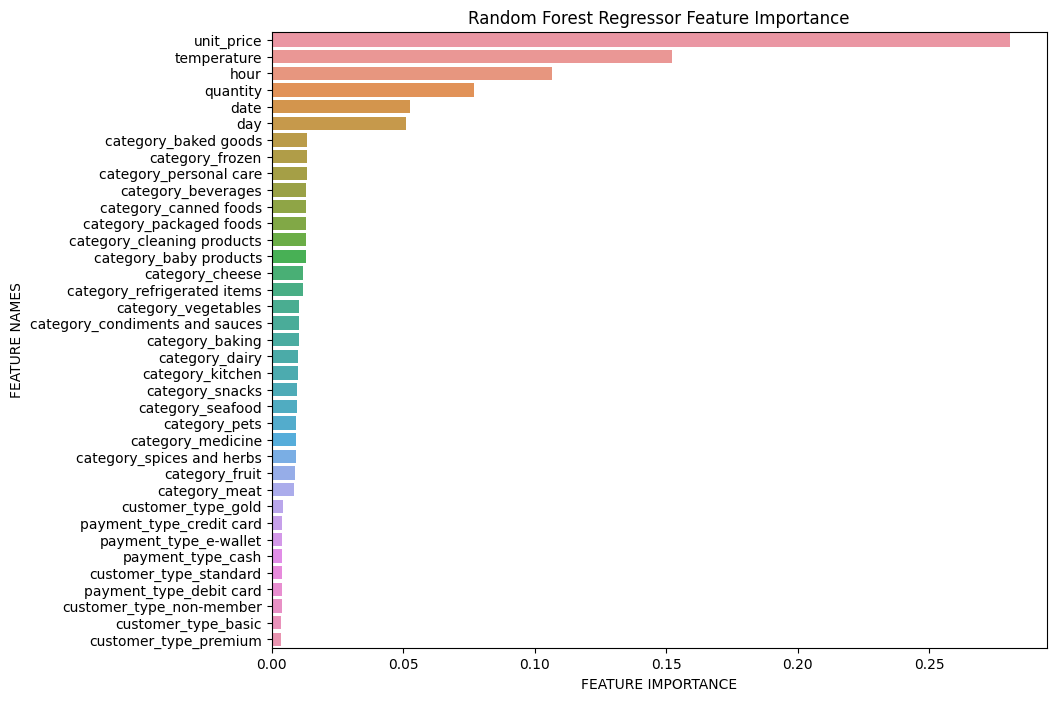

In [278]:
plot_feature_importance(rf.feature_importances_, X.columns, "Random Forest Regressor ")